In [1]:
##############################################
# Modeling
##############################################
from keras import layers, models
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
from sklearn.model_selection import train_test_split


plt.rcParams['font.family'] = "Malgun Gothic"
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

#gpu sync problem
import tensorflow as tf
from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

Using TensorFlow backend.


In [37]:

class ANN(models.Model):
    def __init__(self, Nin, Nh,Nh1, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        hidden1=layers.Dense(Nh1)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        relu1 = layers.Activation('relu')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        h1 = relu1(hidden1(h))
        y = output(h1)

        super().__init__(x, y)

        self.compile(loss='mse', optimizer='sgd')

In [3]:
##############################################
# Data
##############################################
import pandas
 
def csvread(filename='Test A.csv'):
    df = pandas.read_csv(filename) # df is pandas.DataFrame
    return df

# 데이터셋 생성 함수
def seq2dataset(filename = 'Test A.csv'):
    df = csvread('Test A.csv') # df is pandas.DataFrame
    inputdata = df[['Temper','Humidity','Inside abrasives']] 
    return inputdata

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()



def to_integer(dt_time):
    return 1000000*dt_time.month + dt_time.day*10000 + dt_time.hour*100 + dt_time.minute

#전역 변수로 scaler를 설정하여 쓸수있도록 추후에 class 형식으로 만드는 것을 추천
scaler = preprocessing.MinMaxScaler()
def Data_func():
    #(X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    #scaler = preprocessing.MinMaxScaler()
    #X_train = scaler.fit_transform(X_train)
    #X_test = scaler.transform(X_test)
    
    dataset = seq2dataset('Test A.csv')
    # 입력(X)과 출력(Y) 변수로 분리하기
    x_train = dataset[['Temper','Humidity']]
    y_train = np.array(dataset['Inside abrasives'])
    x_train = np.array(x_train).astype('float64')
    
    #scaler = preprocessing.MinMaxScaler()
    mShape = x_train.shape
    x_train = x_train.reshape(-1,1)
    x_train = scaler.fit_transform(x_train)
    x_train = x_train.reshape(mShape)
    target_data = y_train
    
    x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,shuffle = False)
    
    return (x_train, y_train), (x_test, y_test)



In [4]:
##############################################
# Plotting
##############################################
import matplotlib.pyplot as plt
from keraspp.skeras import plot_loss

264/264 [==============================] - 0s 11us/step

Test Loss -> 1.44


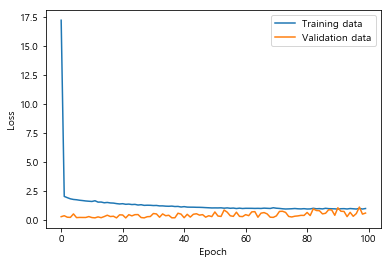

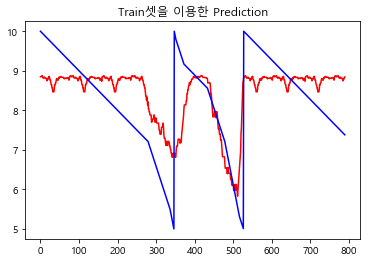

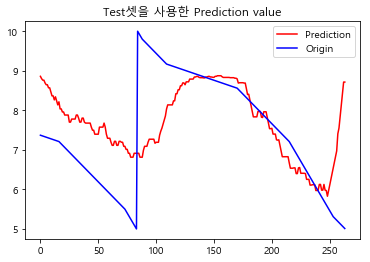

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
dense_91 (Dense)             (None, 64)                192       
_________________________________________________________________
activation_32 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 16)                1040      
_________________________________________________________________
activation_33 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 17        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
##############################################
# Main
##############################################

from keras.utils.vis_utils import plot_model
def main():
    Nin = 2
    Nh = 64
    Nh1 = 16
    Nout = 1

    model = ANN(Nin, Nh,Nh1, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

    performace_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performace_test))

    plot_loss(history)
    plt.show()
    

    xhat = X_test
    yhat = model.predict(xhat)
    ############################
    # overfitting을 확인하기 위한 작업
    trainpred = model.predict(X_train)
    plt.plot(trainpred,'r',label = 'Train Predction')
    plt.plot(y_train,'b',label = 'Origin Y_train')
    plt.title('Train셋을 이용한 Prediction')
    plt.show()
    ###############################
    
    plt.plot(yhat,'r',label = 'Prediction')
    plt.plot(y_test,'b',label = 'Origin')
    plt.title('Test셋을 사용한 Prediction value')
    plt.legend()
    plt.show()
    
    print(model.summary())
    
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    
if __name__ == '__main__':
    main()

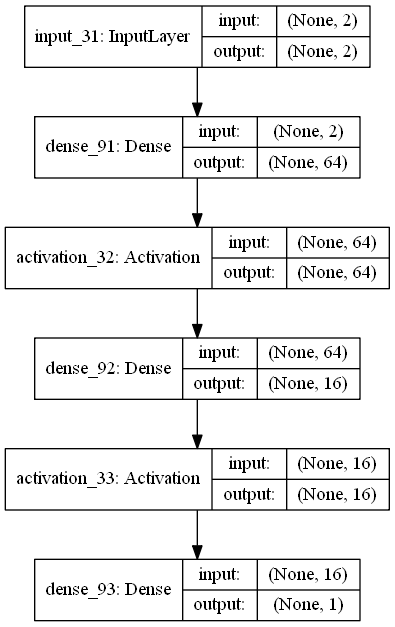

In [39]:
from IPython.display import Image
Image("model_plot.png") 